In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Importing Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from datasets import load_dataset
import random
import math
from scipy.spatial import Voronoi, voronoi_plot_2d

## Importing Dataset

In [ ]:
mnist = load_dataset('mnist')

images = mnist['train']['image']
print(images)



  0%|          | 0/2 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
X_train=[]
for i in images:
  X_train.append(np.array(i).reshape(-1))
X_train=np.array(X_train)

In [ ]:
X_train = X_train.reshape(60000, 784) 

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   

print("Training matrix shape", X_train.shape)

Training matrix shape (60000, 784)


# Q1) (i),(ii)

In [ ]:

X_train = (X_train/255.0).astype(np.float16)
X_mean = np.mean(X_train, axis=0)
X_centered = X_train - X_mean


Covariance matrix shape (784, 784)
eigenvalue matrix shape (784,)
eigenvector matrix shape (784, 784)
eigenvector sorted matrix shape (784, 784)
selected vector matrix shape (784, 150)
[[-4.85900718e-01 -1.22667517e+00 -9.62572426e-02 ...  2.55723006e-03
   6.43312374e-02  1.01121852e-01]
 [-3.96754283e+00 -1.15677955e+00  2.33832994e+00 ...  1.35954956e-01
   1.02011872e-01 -1.09302133e-01]
 [ 2.03517412e-01  1.53778144e+00 -7.39116870e-01 ...  5.18014133e-02
   4.04676348e-01  2.36218095e-02]
 ...
 [ 6.98312909e-01  6.27430247e-01 -1.01076351e+00 ... -5.72719473e-02
   2.33369733e-01  6.98427984e-02]
 [-5.11976653e-01 -2.20598496e-02  2.01506443e+00 ...  4.65301269e-01
  -2.33049510e-01 -1.17930825e-01]
 [ 6.80149362e-01 -9.71462795e-02  2.18035600e+00 ...  9.30497393e-03
  -8.48337456e-02 -5.70175033e-02]]
total_eigenvalues =  52.7275887098218
50.00462069041137
variance experinced:  0.9483578125600268


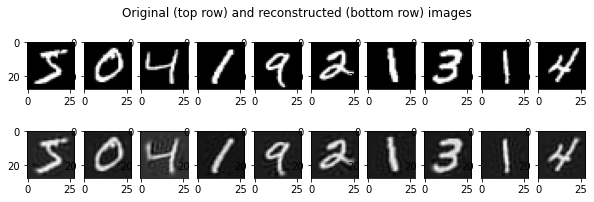

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Step 1 
covariance = np.cov(X_centered, rowvar=False)
print("Covariance matrix shape",covariance.shape)

# Step 2
eigenvalues, eigenvectors = np.linalg.eig(covariance)
print("eigenvalue matrix shape",eigenvalues.shape)
print("eigenvector matrix shape",eigenvectors.shape)
# Step 2
eigenvalues_sorted = eigenvalues[np.argsort(eigenvalues)[::-1]]
eigenvectors_sorted = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
print("eigenvector sorted matrix shape",eigenvectors_sorted.shape)
# Step 4
k = 150  # Example: reduce to 2 dimensions
selected_eigenvalues = eigenvalues_sorted[:k]
selected_eigenvectors = eigenvectors_sorted[:, :k]
print("selected vector matrix shape",selected_eigenvectors.shape)
# Step 5
principal_components = np.dot(X_centered, selected_eigenvectors)
print( principal_components)
# Step 6
total_egnvalues = sum(eigenvalues)
print("total_eigenvalues = ", total_egnvalues)

n_images = 10
print(sum(selected_eigenvalues))
variance_experienced = sum(selected_eigenvalues)/total_egnvalues
print("variance experinced: ", variance_experienced)

reconstructed_images = np.dot(principal_components[:n_images], selected_eigenvectors.T) + X_mean

# Display the original and reconstructed images
fig, axs = plt.subplots(nrows=2, ncols=n_images, figsize=(10, 3))
for i in range(n_images):
    axs[0, i].imshow(X_train[i].reshape(28, 28), cmap=plt.cm.gray)
    axs[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap=plt.cm.gray)
plt.suptitle('Original (top row) and reconstructed (bottom row) images')
plt.show()


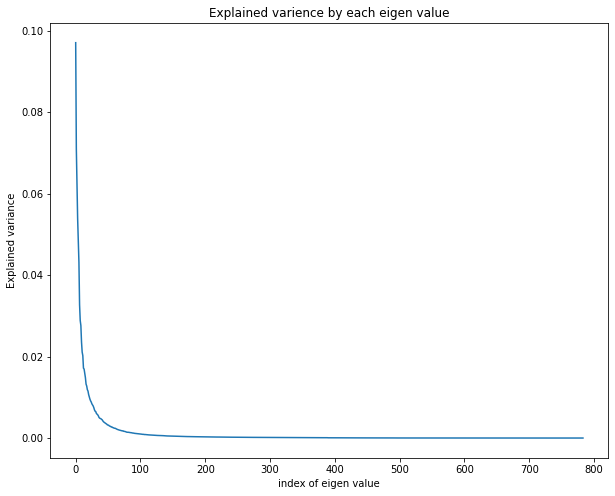

In [ ]:
explained_variances=eigenvalues/eigenvalues.sum()
plt.figure(figsize=(10,8))
plt.plot(explained_variances)
plt.xlabel('index of eigen value')
plt.ylabel('Explained variance')
plt.title('Explained varience by each eigen value')
plt.show()

Choosen dimension in 150 as it gives variance approximately = 95%

In [ ]:
mnist = load_dataset('mnist')

images = mnist['train']['image']
X_train=[]
for i in images:
  X_train.append(np.array(i).reshape(-1))
X_train=np.array(X_train)

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
X_train = (X_train/255.0).astype(np.float16)
X_train = X_train[:600,:]
X_train = X_train.reshape(X_train.shape[0], -1)
# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32') 
print(X_train.shape)  

(600, 784)


## Q1) 3

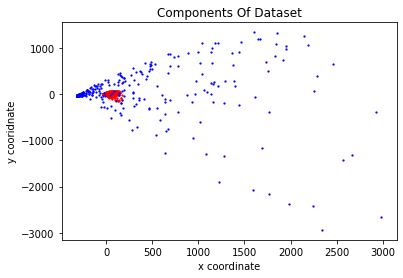

In [ ]:

for d in range(2,4):
  k = np.zeros([X_train.shape[0],X_train.shape[0]])
  for i in range(0,X_train.shape[0]):
    for j in range(0,X_train.shape[0]):
      k[i][j]= (1+np.matmul(X_train[:,i].T, X_train[:,j]))**d
  #centring K
  i = np.identity(X_train.shape[0])
  i_new = np.full((X_train.shape[0],X_train.shape[0]),1/X_train.shape[0])
  C = np.matmul(i-i_new,k)
  Kc = np.matmul(C,i-i_new)
  from numpy.linalg import eigh
  eigen_value,eigen_vector = eigh(Kc)
  order = eigen_value.argsort()[::-1] #Argsort returns the order in which eigen values will be arranged if sorted    
  eigen_value =eigen_value[order]
  eigen_vector = eigen_vector[:,order]
  eigen_value = eigen_value[0:2]
  eigen_vector = eigen_vector[:,0:2]
  alpha = eigen_vector/(np.sqrt(eigen_value))
  components = np.matmul(alpha.T,Kc)
  plt.title("Components Of Dataset") 
  plt.xlabel("x coordinate") 
  plt.ylabel("y cooridnate") 
  if d==2:
      plt.scatter(components[0,:],components[1,:],c='r',s=5,linewidth=0)
  if d==3:
      plt.scatter(components[0,:],components[1,:],c='b',s=5,linewidth=0)

plt.show()

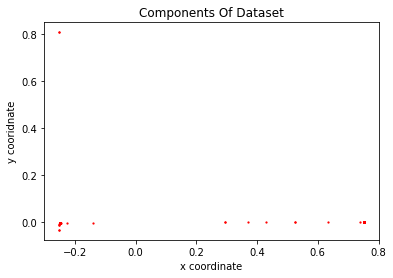

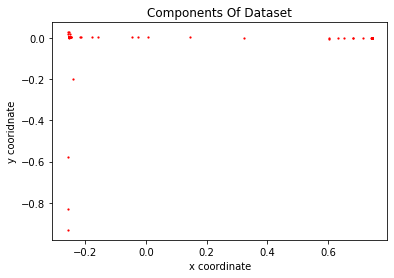

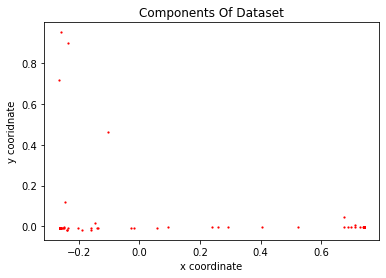

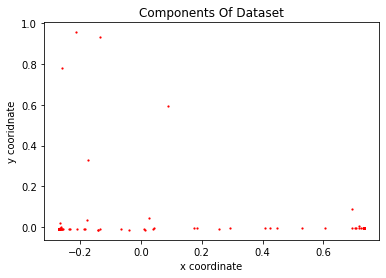

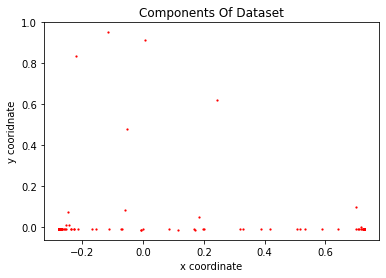

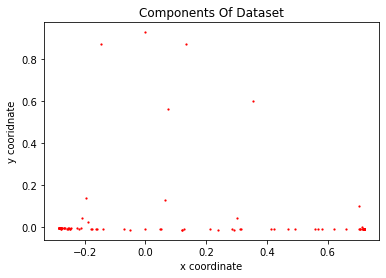

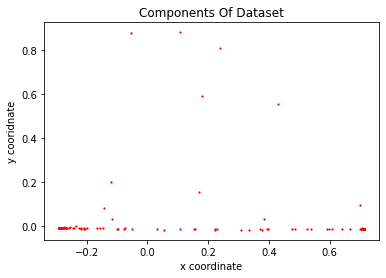

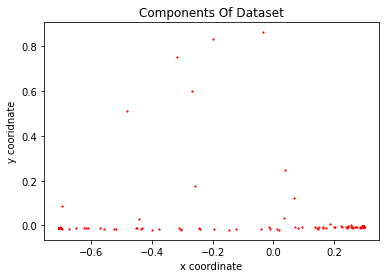

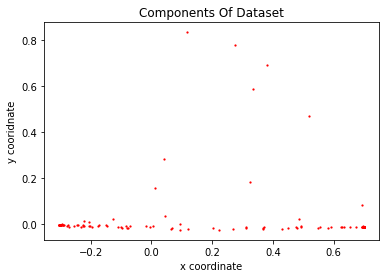

In [ ]:
for var in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9):
  k = np.zeros([X_train.shape[0],X_train.shape[0]])
  for i in range(0,X_train.shape[0]):
    for j in range(0,X_train.shape[0]):
      k[i][j] = np.exp(-(np.matmul((X_train[:,i]-X_train[:,j]).T,(X_train[:,i]-X_train[:,j])))/(var**2))
  #centring K
  i = np.identity(X_train.shape[0])
  i_new = np.full((X_train.shape[0],X_train.shape[0]),1/X_train.shape[0])
  C = np.matmul(i-i_new,k)
  Kc = np.matmul(C,i-i_new)
  from numpy.linalg import eigh
  eigen_value,eigen_vector = eigh(Kc)
  order = eigen_value.argsort()[::-1] #Argsort returns the order in which eigen values will be arranged if sorted    
  eigen_value =eigen_value[order]
  eigen_vector = eigen_vector[:,order]
  eigen_value = eigen_value[0:2]
  eigen_vector = eigen_vector[:,0:2]
  alpha = eigen_vector/(np.sqrt(eigen_value))
  components = np.matmul(alpha.T,Kc)
  plt.title("Components Of Dataset") 
  plt.xlabel("x coordinate") 
  plt.ylabel("y cooridnate") 
  plt.scatter(components[0,:],components[1,:],c='r',s=5,linewidth=0) 
    
  plt.show()

(2, 999)


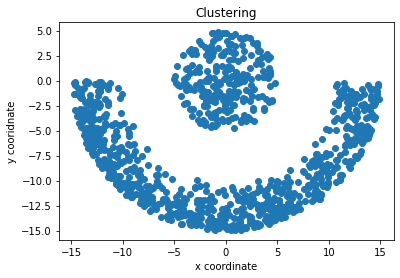

In [ ]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_csv("/content/cm_dataset_2.csv")
#print(df)

shape = df.shape
shape = np.array(shape)
#shape = shape + (1,0)
data=df.to_numpy()
# #Capturing Data
# import csv 
# import numpy as np
# data = np.zeros(shape)
# i=0
# with open('/content/cm_dataset_2.csv') as file:    
#     csv_reader = csv.reader(file)    
#     for row in csv_reader:        
#         for j in range(0,2):
#             data[i][j] = row[j]
#         i=i+1
X = data.T
print(X.shape)
plt.title("Clustering") 
plt.xlabel("x coordinate") 
plt.ylabel("y cooridnate")
    
plt.scatter(X[0,:], X[1,:])    
plt.show()

#Q2) i

In [ ]:
import random
def initialization(X, k, centroids):
  for i in range(0,k):
   p = random.randint(0,999)
   centroids[:,i] = X[:,p]
  return centroids

In [ ]:
import math
def reassign_clusters(X, centroids, k):
  
  clusters = {}
  for i in range(0,k):
    clusters[i] = []
  z = np.zeros(X.shape[1])
  objective = np.zeros((k,X.shape[1]))
  
  for i in range(X.shape[1]):
    for j in range(k):
      objective[j][i] = math.dist(X[:,i],centroids[:,j])
  
  for i in range(X.shape[1]):
    z[i] = np.argmin(objective[:,i])
    clusters[z[i]].append(X[:,i].tolist())
  
  return clusters

In [ ]:
def reassign_centroids(centroids, clusters,k):
  for i in range(k):  
        centroids[i] = np.average(np.array(clusters[i]), axis=0)
  return centroids

In [ ]:
def plot_clusters(clusters, centroids,k):
  colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
  for i in range(k):
          for cluster in clusters[i]:
              plt.scatter(cluster[0], cluster[1], c=colors[i % 2]) 
          

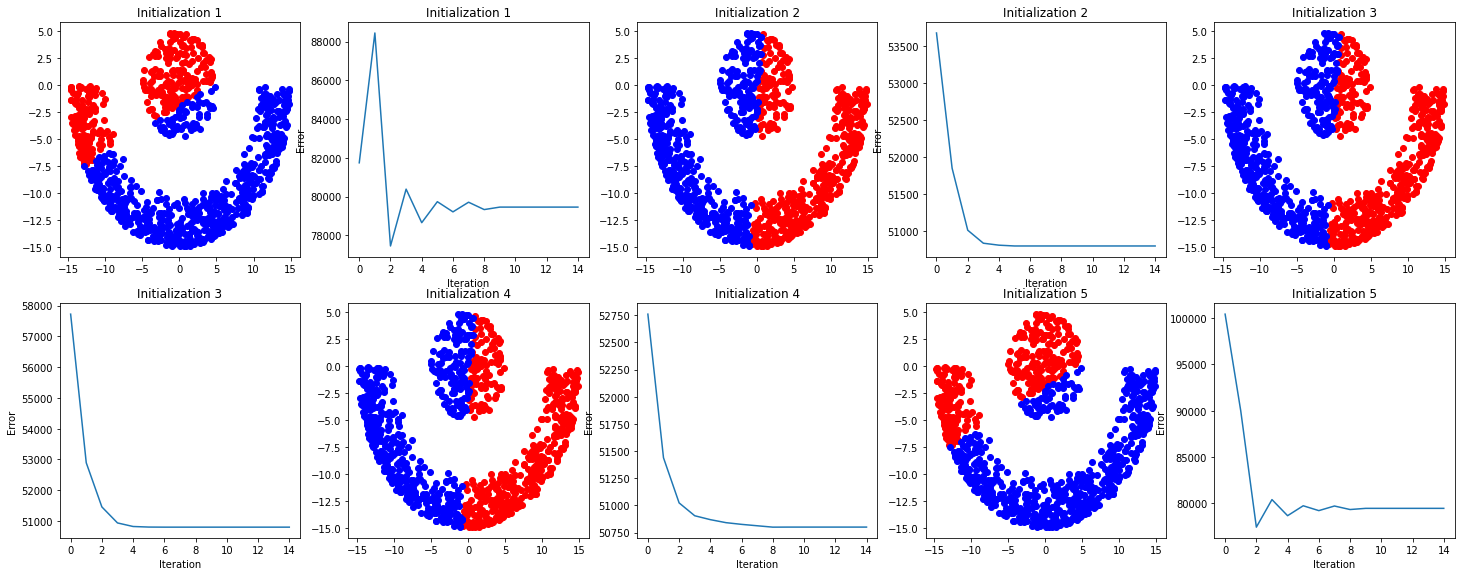

In [ ]:
repeats = 10
centroids_list = []
num_iterations = 15
k=2
f = 0
fig, ax = plt.subplots(figsize=(25, 25))
for i in range(0,5):
    centroids = np.zeros((2,2))
    centroids = initialization(X,2, centroids)
    clusters = reassign_clusters(X, centroids, k)
    centroids = reassign_centroids(centroids, clusters, k)
    centroids_list.append(centroids)
  
  # Run k-means for each initialization
for idx, c in enumerate(centroids_list):
    objective = np.zeros(num_iterations)
    for i in range(num_iterations):
      # Assign data points to clusters
      clusters = reassign_clusters(X, c, k)
      # Reassign centroids
      c = reassign_centroids(c, clusters, k)
      # Compute error function
      error = 0
      for j in range(k):
        for x in clusters[j]:
          error += np.linalg.norm(x - c[:,j])**2
      objective[i] = error
      

    # Plot clusters

    plt.subplot(5, 5, idx+1+f)
    plt.title('Initialization ' + str(idx+1))
    plot_clusters(clusters, c, 2)
    plt.subplot(5, 5, idx+2+f)
    plt.title('Initialization ' + str(idx+1))
    plt.plot(range(num_iterations), objective)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    f=f+1
plt.show()


# Q2) ii

In [ ]:
import random
def initialization(X, k, centroids):
  for i in range(0,k):
   p = random.randint(0,999)
   centroids[i,:] = X[:,p]
   print(centroids)
  return centroids


In [ ]:
import math
def reassign_clusters(X, centroids, k):
  
  clusters = {}
  for i in range(0,k):
    clusters[i] = []
  z = np.zeros(X.shape[1])
  objective = np.zeros((k,X.shape[1]))
  
  for i in range(X.shape[1]):
    for j in range(k):
      objective[j][i] = math.dist(X[:,i],centroids[j,:])
  
  for i in range(X.shape[1]):
    z[i] = np.argmin(objective[:,i])
    clusters[z[i]].append(X[:,i])
  return clusters

In [ ]:
def reassign_centroids(centroids, clusters,k):
  for i in range(k):
        
        centroids[i] = np.average(clusters[i], axis=0)
        #centroids[i] = np.mean(np.vstack(clusters[i]), axis=0)
  return centroids

In [ ]:

def plot_clusters(clusters, centroids,k):
  colors = ['red', 'blue' , 'green', 'orange', 'purple', 'gray', 'yellow','black']
  for i in range(k):
          for cluster in clusters[i]:
              plt.scatter(cluster[0], cluster[1], c=colors[i])

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_clusters_vornoi(clusters, centroids, k):
    # Generate a Voronoi diagram
  
      points = [centroid for centroid in centroids]
      vor = Voronoi(points)

      # Create a new figure with a size of 8 inches by 8 inches
      fig, ax = plt.subplots(figsize=(10, 10))

      # Plot the Voronoi regions
      voronoi_plot_2d(vor, show_vertices=True, line_colors='gray',
                      line_width=2, line_alpha=0.5, point_size=2, ax=ax)

      # Plot the clusters
      colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'yellow', 'black']
      for i in range(k):
          for cluster in clusters[i]:
              plt.scatter(cluster[0], cluster[1], c=colors[i])

      plt.xlim(min(X[0,:]-3), max(X[0,:])+3)
      plt.ylim(min(X[1,:]-3), max(X[1,:])+3)
      plt.title('Voronoi diagram with K-means clusters')
      plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_voronoi_regions_2(clusters, centroids):
    # Get the two centroids and their positions
    cA = centroids[0]
    cB = centroids[1]
    posA = np.array(cA)
    posB = np.array(cB)

    fig, ax = plt.subplots(figsize=(10, 10))
    # Plot the Voronoi regions and the centroids
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'yellow', 'black']
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i])

    plt.scatter([cA[0], cB[0]], [cA[1], cB[1]], marker='x', s=200, c='black')
    plt.title('Voronoi regions with two clusters')
    mid = (posA + posB) / 2
    
    # Compute the vector perpendicular to the line connecting the centroids
    perp = np.array([-posB[1] + posA[1], posB[0] - posA[0]])
    
    # Normalize the vector and compute the endpoints of the perpendicular bisector
    perp = perp / np.linalg.norm(perp)
    p1 = mid + perp * 100
    p2 = mid - perp * 100
    plt.xlim(min(X[0,:]-3), max(X[0,:])+3)
    plt.ylim(min(X[1,:]-3), max(X[1,:])+3)
    # Plot the perpendicular bisector
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black', linestyle='--')
    plt.show()



In [ ]:
def make_vornoi(X,k):   
    repeats = 30
    centroids_list = []
    num_iterations = 20

    f = 0
    # fig, ax = plt.subplots(figsize=(10,10))
    for i in range(0,1):
      centroids = np.zeros((k,2))
      centroids = initialization(X,k, centroids)
      clusters = reassign_clusters(X, centroids, k)
      centroids = reassign_centroids(centroids, clusters, k)
      centroids_list.append(centroids)

    # Run k-means for each initialization
    for idx, c in enumerate(centroids_list):
      objective = np.zeros(num_iterations)
      for i in range(num_iterations):
        # Assign data points to clusters
        clusters = reassign_clusters(X, c, k)
        # Reassign centroids
        c = reassign_centroids(c, clusters, k)

      # Plot clusters
      if(k==2):
        plot_voronoi_regions_2(clusters, c)
      else:
        plot_clusters_vornoi(clusters, c, k)



[[-11.324   -9.3782]
 [  0.       0.    ]]
[[-11.324    -9.3782 ]
 [ -0.15552 -13.482  ]]


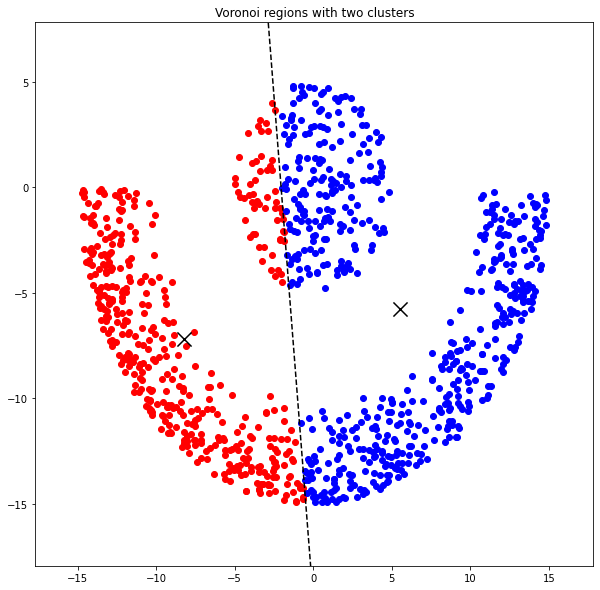

[[10.743  -8.6838]
 [ 0.      0.    ]
 [ 0.      0.    ]]
[[ 10.743   -8.6838]
 [ -2.4311 -13.005 ]
 [  0.       0.    ]]
[[ 10.743   -8.6838]
 [ -2.4311 -13.005 ]
 [ -3.82    -0.3262]]


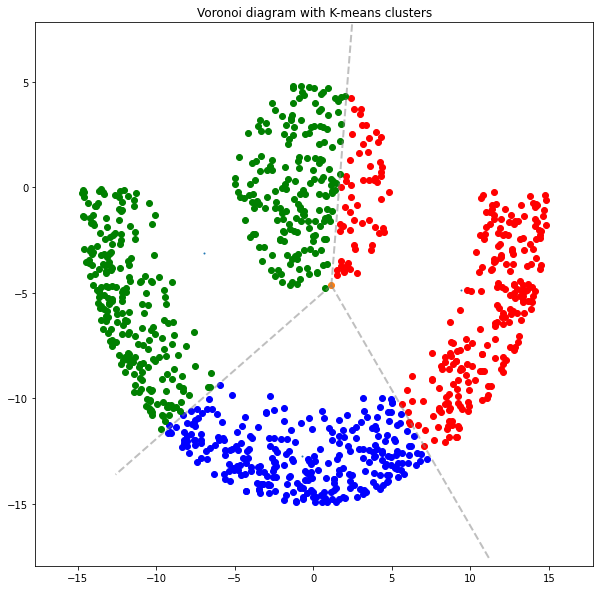

[[11.533 -3.397]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]]
[[11.533  -3.397 ]
 [ 3.74   -2.7051]
 [ 0.      0.    ]
 [ 0.      0.    ]]
[[11.533  -3.397 ]
 [ 3.74   -2.7051]
 [12.037  -4.6947]
 [ 0.      0.    ]]
[[ 11.533   -3.397 ]
 [  3.74    -2.7051]
 [ 12.037   -4.6947]
 [  1.878  -11.476 ]]


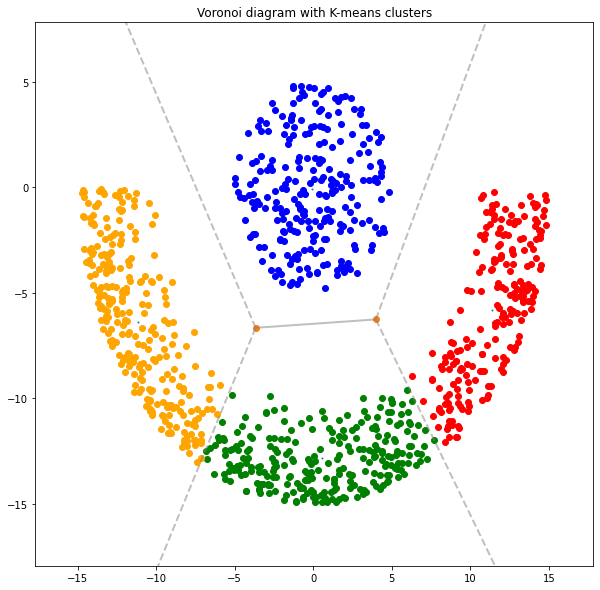

[[14.365  -2.0391]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]
 [ 0.      0.    ]]
[[ 14.365   -2.0391]
 [  4.8223 -13.631 ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]]
[[ 14.365    -2.0391 ]
 [  4.8223  -13.631  ]
 [ -0.86698  -0.91319]
 [  0.        0.     ]
 [  0.        0.     ]]
[[ 14.365    -2.0391 ]
 [  4.8223  -13.631  ]
 [ -0.86698  -0.91319]
 [ -2.7524  -14.105  ]
 [  0.        0.     ]]
[[ 14.365    -2.0391 ]
 [  4.8223  -13.631  ]
 [ -0.86698  -0.91319]
 [ -2.7524  -14.105  ]
 [  1.3253  -13.814  ]]


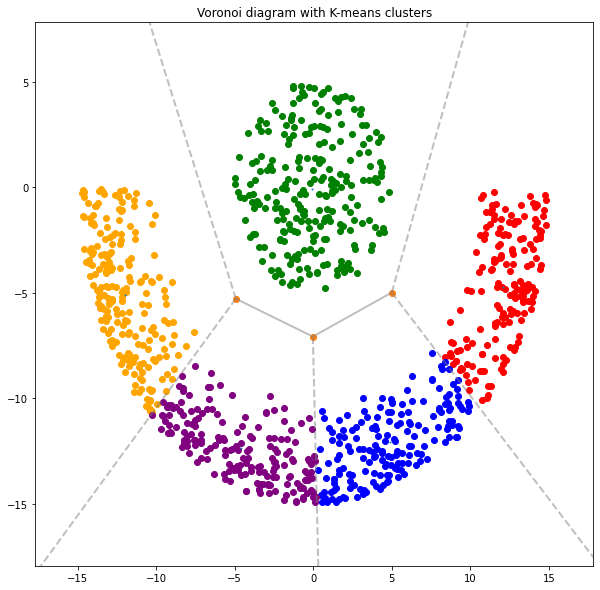

In [ ]:
for k in range (2,6):
  make_vornoi(X,k)

In [ ]:
print(X.shape)

(2, 999)


# Spectral Clustering

In [ ]:
X_new=X.T

In [ ]:
import random
def initialization(x, k, centroids):
  for i in range(0,k):
   p = random.randint(0,999)
   centroids[i,:] = x[:,p]
   print(centroids)
  return centroids

import math
def reassign_clusters(X, centroids, k):
  
  clusters = {}
  for i in range(0,k):
    clusters[i] = []
  z = np.zeros(X.shape[1])
  objective = np.zeros((k,X.shape[1]))
  
  for i in range(X.shape[1]):
    for j in range(k):
      objective[j][i] = math.dist(X[:,i],centroids[j,:])
  
  for i in range(X.shape[1]):
    z[i] = np.argmin(objective[:,i])
    clusters[z[i]].append(X[:,i])
  return (clusters,z)

def reassign_centroids(centroids, clusters,k):
  for i in range(k):
        
        centroids[i] = np.average(clusters[i], axis=0)
  return centroids

In [ ]:
print(X_new.shape)
k = np.zeros((X_new.shape[0],X_new.shape[0]))
for i in range(0,X_new.shape[0]):
  for j in range(0,X_new.shape[0]):
     if(i!=j):
      k[i][j] = np.exp(-(np.matmul((X_new[i,:]-X_new[j,:]).T,(X_new[i,:]-X_new[j,:])))/(2*1.5**2))
print(k.shape)
row_sums = k.sum(axis=1)**(-0.5)
D = np.diag(row_sums)
L = (D@k)@D
from numpy.linalg import eig
eigen_value,eigen_vector = eig(L)
order = eigen_value.argsort()[::-1] #Argsort returns the order in which eigen values will be arranged if sorted    
eigen_value =eigen_value[order]
eigen_vector = eigen_vector[:,order]
eigen_value = eigen_value[0:2]
h = eigen_vector[:,0:2]
rowNorm=np.linalg.norm(h,axis=1)
new_matrix=np.zeros_like(h)
new_matrix[:,0],new_matrix[:,1]=h[:,0]/rowNorm,h[:,1]/rowNorm
print("h_matrix",new_matrix)
print(h.shape)


(999, 2)
(999, 999)
h_matrix [[-0.46096064 -0.88742058]
 [-0.46092179 -0.88744076]
 [-0.46089853 -0.88745284]
 ...
 [-0.88741773  0.46096614]
 [-0.88758644  0.4606412 ]
 [-0.88741909  0.4609635 ]]
(999, 2)


# 2(iii)

(999, 2)
[[-0.46096064 -0.88742058]
 [-0.46092179 -0.88744076]
 [-0.46089853 -0.88745284]
 ...
 [-0.88741773  0.46096614]
 [-0.88758644  0.4606412 ]
 [-0.88741909  0.4609635 ]]
[[-0.8879605   0.45991972]
 [ 0.          0.        ]]
[[-0.8879605   0.45991972]
 [-0.8875043   0.46079944]]
[[-0.8879605   0.45991972]
 [-0.8875043   0.46079944]]


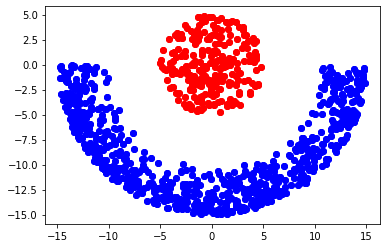

In [ ]:
print(h.shape)
print(new_matrix)
new_matrix = new_matrix.T
repeats = 30
centroids_list = []
num_iterations = 20
k=2
f = 0
# fig, ax = plt.subplots(figsize=(10,10))
for i in range(0,1):
    centroids = np.zeros((k,2))
    centroids = initialization(new_matrix,2, centroids)
    print(centroids)
    clusters,z = reassign_clusters(new_matrix, centroids, k)
    centroids = reassign_centroids(centroids, clusters, k)
    centroids_list.append(centroids)
  
  # Run k-means for each initialization
for idx, c in enumerate(centroids_list):
    objective = np.zeros(num_iterations)
    for i in range(num_iterations):
      # Assign data points to clusters
      clusters,z = reassign_clusters(new_matrix, c, k)
      # Reassign centroids
      c = reassign_centroids(c, clusters, k)

    # Plot clusters

    # plt.subplot(1, 1, idx+1)
    #plt.title('Initialization ' + str(idx+1))
    cluster_new = {}
    for i,zi in enumerate(z):
      if(zi in cluster_new):
        cluster_new[zi].append(X[:,i])
      else:
        cluster_new[zi]=[]
        cluster_new[zi].append(X[:,i])
    plot_clusters(cluster_new, 0,2)
    plot_clusters(cluster_new, c, 2)

#plt.show()


# 2(iv)

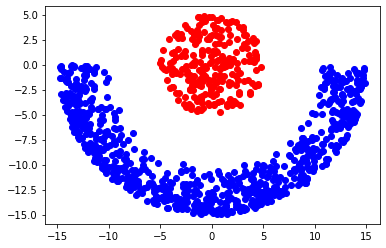

In [ ]:
z = np.argmax(h, axis=1)
cluster = {}
for i,zi in enumerate(z):
  if(zi in cluster):
    cluster[zi].append(X[:,i])
  else:
    cluster[zi]=[]
    cluster[zi].append(X[:,i])
plot_clusters(cluster, 0,2) 

In [ ]:
print(X.shape)

(2, 999)
